**Challenge**: https://www.kaggle.com/c/dogs-vs-cats/


**Dataset**: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-06-18 11:54:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   190MB/s    in 0.3s    

2019-06-18 11:54:19 (190 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir('/tmp')

['cats_and_dogs_filtered.zip', 'cats_and_dogs_filtered']

In [0]:
base_dir='/tmp/cats_and_dogs_filtered'

#training and validation directory
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#training directory
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

#validation directory
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


print('Total training cat images.   ',len(os.listdir(train_cats_dir)))
print('Total training dog images.   ',len(os.listdir(train_dogs_dir)))

print('Total Validation cat images.   ',len(os.listdir(validation_cats_dir)))
print('Total Validation dog images.   ',len(os.listdir(validation_dogs_dir)))

['cat.239.jpg', 'cat.680.jpg', 'cat.279.jpg', 'cat.847.jpg', 'cat.170.jpg', 'cat.937.jpg', 'cat.692.jpg', 'cat.831.jpg', 'cat.850.jpg', 'cat.54.jpg']
['dog.514.jpg', 'dog.192.jpg', 'dog.504.jpg', 'dog.607.jpg', 'dog.152.jpg', 'dog.860.jpg', 'dog.454.jpg', 'dog.522.jpg', 'dog.32.jpg', 'dog.784.jpg']
Total training cat images.    1000
Total training dog images.    1000
Total Validation cat images.    500
Total Validation dog images.    500


In [7]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

W0618 11:56:04.382916 139673257736064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

W0618 11:56:27.007203 139673257736064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled here
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 12s - loss: 0.8861 - acc: 0.5550 - val_loss: 0.7645 - val_acc: 0.5070
Epoch 2/15
100/100 - 7s - loss: 0.6476 - acc: 0.6400 - val_loss: 0.6757 - val_acc: 0.6310
Epoch 3/15
100/100 - 7s - loss: 0.5653 - acc: 0.7170 - val_loss: 0.6648 - val_acc: 0.6250
Epoch 4/15
100/100 - 7s - loss: 0.4878 - acc: 0.7575 - val_loss: 0.6150 - val_acc: 0.6740
Epoch 5/15
100/100 - 7s - loss: 0.4107 - acc: 0.8165 - val_loss: 0.5971 - val_acc: 0.6780
Epoch 6/15
100/100 - 7s - loss: 0.3143 - acc: 0.8655 - val_loss: 0.7010 - val_acc: 0.6890
Epoch 7/15
100/100 - 7s - loss: 0.2294 - acc: 0.9035 - val_loss: 1.0275 - val_acc: 0.6600
Epoch 8/15
100/100 - 7s - loss: 0.1845 - acc: 0.9245 - val_loss: 0.9079 - val_acc: 0.6960
Epoch 9/15
100/100 - 7s - loss: 0.1082 - acc: 0.9595 - val_loss: 1.0876 - val_acc: 0.7100
Epoch 10/15
100/100 - 7s - loss: 0.0950 - acc: 0.9685 - val_loss: 1.1713 - val_acc: 0.7090
Epoch 11/15
100/100 - 7s - loss: 0.0645 - acc: 0.9805 - val_loss: 1.4749 - val_acc: 0.7150
Epoch 1

Text(0.5, 1.0, 'Training and validation loss')

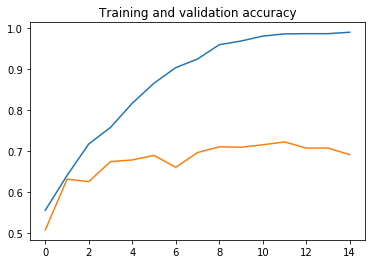

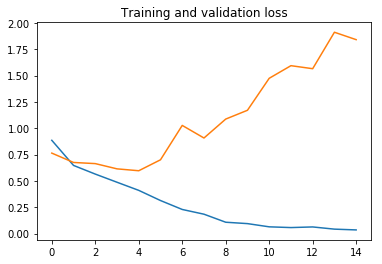

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )